# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np

training_file = 'C:\\Users\\ElJamoquio\\Desktop\\Classes\\SelfDrivingCar\\Lesson 11 - Traffic Sign Classifier Videos\\traffic-signs-data\\train.p'
validation_file='C:\\Users\\ElJamoquio\\Desktop\\Classes\\SelfDrivingCar\\Lesson 11 - Traffic Sign Classifier Videos\\traffic-signs-data\\valid.p'
testing_file = 'C:\\Users\\ElJamoquio\\Desktop\\Classes\\SelfDrivingCar\\Lesson 11 - Traffic Sign Classifier Videos\\traffic-signs-data\\test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
##Basic Summary of Data
n_train = len(X_train)               #Number of Training Examples
n_test  = len(X_test)                #Number of Testing Examples
n_valid = len(X_valid)               #Number of Validation Examples
image_shape = X_test.shape[1:]       #Shape of the images
n_classes = len(np.unique(y_train))  #How Many Classes there are
print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
#print("Image data shape =", X_train.shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

C:\Program Files\Miniconda3\envs\carnd-term1\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


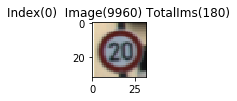

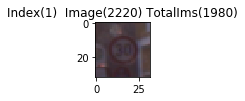

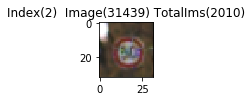

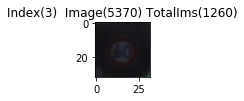

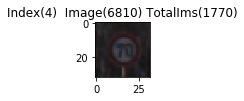

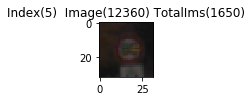

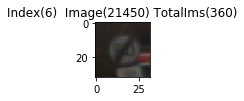

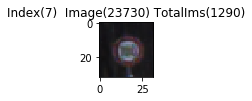

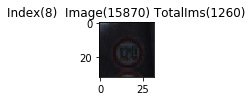

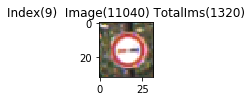

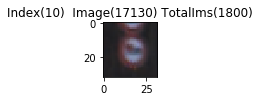

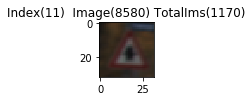

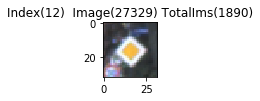

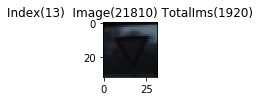

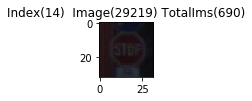

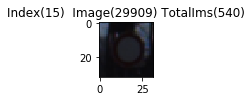

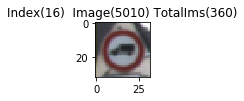

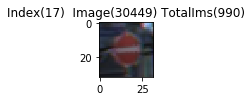

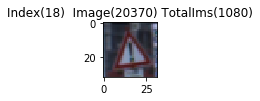

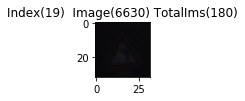

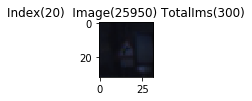

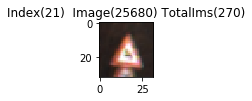

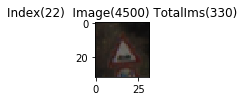

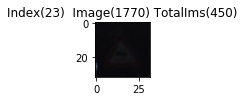

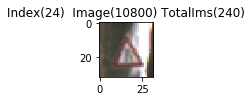

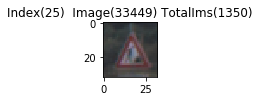

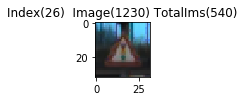

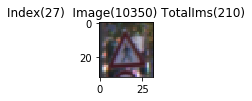

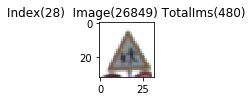

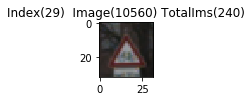

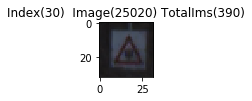

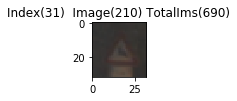

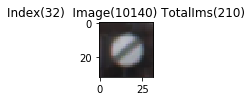

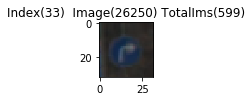

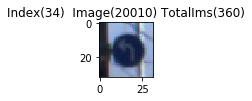

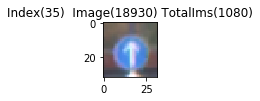

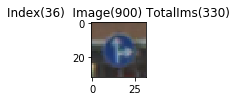

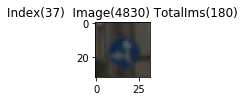

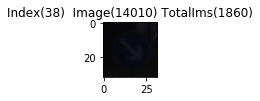

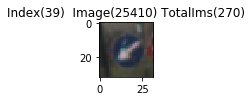

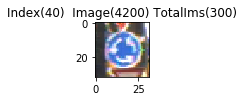

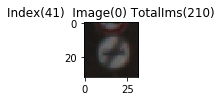

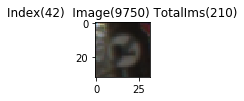

In [3]:
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for num in np.unique(y_train):
    index = np.argmax(y_train==num)      #semi-random example to plot
    totalImages = sum(y_train == num)    #total number of images of a given type
    image = X_train[index].squeeze()     
    plt.figure(figsize=(1,1))
    plt.imshow(X_train[index,:,:,:])
    plt.title("Index(" + str(y_train[index])+")  Image(" + str(index)+") TotalIms(" + str(totalImages) +")" ) 
    #Other Plots not currently using are mapping it to grey and normalized and then showing them
    #plt.figure(figsize=(1,1))
    #plt.imshow(grey[index,:,:],cmap="gray")
    #plt.title(str(y_train[index])+" " + str(index))
    #plt.figure(figsize=(1,1))
    #plt.imshow(greyNorm[index,:,:],cmap="gray")
    #plt.title(str(y_train[index])+" " + str(index))





----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
origImage = X_train[9960,:,:,:]  #save one example of the pre-processed data for comparison later

# Some pre-processing and normalization of the training data
def preProcessImage(imageMatrix):
    grey = 0.2989*imageMatrix[:,:,:,0]+0.587*imageMatrix[:,:,:,1]+0.114*imageMatrix[:,:,:,2]
    mean = np.mean(np.mean(grey[:,:,:],axis=1),axis=1)
    stde = np.std(np.std(grey,axis=1),axis=1)
    norm = np.zeros_like(grey)
    for ind in range(0,len(grey)):
        norm[ind,:,:] = (grey[ind,:,:]-mean[ind])/stde[ind]
    norm = norm[..., np.newaxis]     #easier to keep another axis here when I was switching back and forth between RGB and grey
    return norm

X_train = preProcessImage(X_train)
X_test = preProcessImage(X_test)
X_valid = preProcessImage(X_valid)

processedImage = X_train[9960,:,:,0]  #corresponds to the previous image also saved


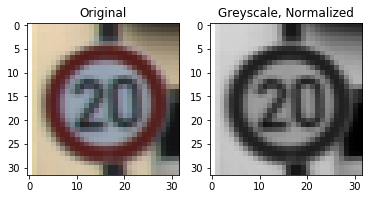

In [5]:
fig = plt.figure()
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(origImage)
a.set_title('Original')
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(processedImage,cmap="gray")
a.set_title('Greyscale, Normalized')

### Model Architecture

In [6]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

import tensorflow as tf
#from tensorflow import flatten
EPOCHS = 20
BATCH_SIZE = 50
    
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = .1
    initialHeight = 10
        
    #Layer 1: Convolutional. Input = 32x32x1. Output = 30x30xinitialHeight.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, initialHeight), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(initialHeight))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    print('conv1a')
    print(conv1.get_shape() )

    #Layer2: Pooling. Input = 30x30xinitialHeight. Output = 15x15xinitialHeight.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print('conv1b')
    print(conv1.get_shape() )

    #Layer3: Convolutional. Output = 11x11x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, initialHeight, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    print('conv2')
    print(conv2.get_shape() )
    
    #Layer4:  Pooling. Input = 11x11x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print('conv2b')
    print(conv2.get_shape() )
    
    #Layer5:  Flatten. Input = 5x5x16. Output = 400.
    fc0   = tf.contrib.layers.flatten(conv2)
    print('fc0')
    print(fc0.get_shape() )
    
    #Layer6: Fully Connected. Input = 400. Output = 256.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 256), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(256))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)

    #Layer7: Fully Connected. Input = 256. Output = 164.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(256, 164), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(164))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)

    #Layer8: Fully Connected. Input = 164. Output = 105.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(164, 105), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(105))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    fc3    = tf.nn.relu(fc3)
    
    #Layer9: Fully Connected. Input = 105. Output = 67.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(105, 67), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(67))
    fc4 = tf.matmul(fc3, fc4_W) + fc4_b
    fc4    = tf.nn.relu(fc4)
    
    #Layer10: Fully Connected. Input = 67. Output = n_classes.
    fc5_W  = tf.Variable(tf.truncated_normal(shape=(67, n_classes), mean = mu, stddev = sigma))
    fc5_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc4, fc5_W) + fc5_b                  
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
rate = 0.001
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {}; ".format(i+1)+ "  Validation Accuracy = {:.3f}".format(validation_accuracy))
    saver.save(sess, './lenetV4norm')
    print("Model saved")
    
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))   



conv1a
(?, 30, 30, 10)
conv1b
(?, 15, 15, 10)
conv2
(?, 11, 11, 16)
conv2b
(?, 5, 5, 16)
fc0
(?, 400)
Training...

EPOCH 1;   Validation Accuracy = 0.865
EPOCH 2;   Validation Accuracy = 0.841
EPOCH 3;   Validation Accuracy = 0.925
EPOCH 4;   Validation Accuracy = 0.914
EPOCH 5;   Validation Accuracy = 0.928
EPOCH 6;   Validation Accuracy = 0.929
EPOCH 7;   Validation Accuracy = 0.912
EPOCH 8;   Validation Accuracy = 0.926
EPOCH 9;   Validation Accuracy = 0.946
EPOCH 10;   Validation Accuracy = 0.933
EPOCH 11;   Validation Accuracy = 0.927
EPOCH 12;   Validation Accuracy = 0.924
EPOCH 13;   Validation Accuracy = 0.944
EPOCH 14;   Validation Accuracy = 0.943
EPOCH 15;   Validation Accuracy = 0.944
EPOCH 16;   Validation Accuracy = 0.927
EPOCH 17;   Validation Accuracy = 0.956
EPOCH 18;   Validation Accuracy = 0.932
EPOCH 19;   Validation Accuracy = 0.935
EPOCH 20;   Validation Accuracy = 0.942
Model saved
Test Accuracy = 0.934


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

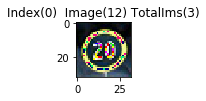

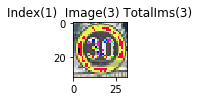

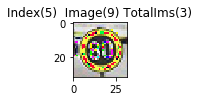

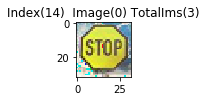

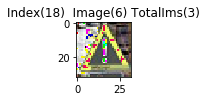

In [8]:
X_downloadedImages = np.zeros([15,32,32,3])
X_downloadedImages[0,:,:,:]  = cv2.imread('1a.jpg')
X_downloadedImages[1,:,:,:]  = cv2.imread('1b.jpg')
X_downloadedImages[2,:,:,:]  = cv2.imread('1c.jpg')
X_downloadedImages[3,:,:,:]  = cv2.imread('2a.jpg')
X_downloadedImages[4,:,:,:]  = cv2.imread('2b.jpg')
X_downloadedImages[5,:,:,:]  = cv2.imread('2c.jpg')
X_downloadedImages[6,:,:,:]  = cv2.imread('3a.jpg')
X_downloadedImages[7,:,:,:]  = cv2.imread('3b.jpg')
X_downloadedImages[8,:,:,:]  = cv2.imread('3c.jpg')
X_downloadedImages[9,:,:,:]  = cv2.imread('4a.jpg')
X_downloadedImages[10,:,:,:] = cv2.imread('4b.jpg')
X_downloadedImages[11,:,:,:] = cv2.imread('4c.jpg')
X_downloadedImages[12,:,:,:] = cv2.imread('5a.jpg')
X_downloadedImages[13,:,:,:] = cv2.imread('5b.jpg')
X_downloadedImages[14,:,:,:] = cv2.imread('5c.jpg')
y_downloadedImages = np.uint8([14,14,14,1,1,1,18,18,18,5,5,5,0,0,0])
    

for num in np.unique(y_downloadedImages):
    index = np.argmax(y_downloadedImages==num)      #semi-random example to plot
    totalImages = sum(y_downloadedImages == num)    #total number of images of a given type
    image = X_downloadedImages[index].squeeze()     
    plt.figure(figsize=(1,1))
    plt.imshow(X_downloadedImages[index,:,:,:])
    plt.title("Index(" + str(y_downloadedImages[index])+")  Image(" + str(index)+") TotalIms(" + str(totalImages) +")" ) 
    

### Predict the Sign Type for Each Image

In [9]:
X_downloadedImages = preProcessImage(X_downloadedImages)

In [10]:
#started with some of the code from the forum on this one
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))    
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: X_downloadedImages})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)
    test_accuracy = evaluate(X_downloadedImages, y_downloadedImages)

### Analyze Performance

In [11]:
print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [12]:
for i in range(15):
    print("Answer: " + str(y_downloadedImages[i]))
    print("   Predicted Answer: {:2.0f}".format(predictions[i,0]) +" With Probability {:3.3f}".format(100*probs[i,0]) +"%")
    print("         2nd Answer: {:2.0f}".format(predictions[i,1]) +" With Probability {:3.3f}".format(100*probs[i,1]) +"%")
    print("         3rd Answer: {:2.0f}".format(predictions[i,2]) +" With Probability {:3.3f}".format(100*probs[i,2]) +"%")
    print("         4th Answer: {:2.0f}".format(predictions[i,3]) +" With Probability {:3.3f}".format(100*probs[i,3]) +"%")
    print("         5th Answer: {:2.0f}".format(predictions[i,4]) +" With Probability {:3.3f}".format(100*probs[i,4]) +"%")

Answer: 14
   Predicted Answer: 14 With Probability 100.000%
         2nd Answer:  3 With Probability 0.000%
         3rd Answer: 34 With Probability 0.000%
         4th Answer: 30 With Probability 0.000%
         5th Answer: 20 With Probability 0.000%
Answer: 14
   Predicted Answer: 14 With Probability 100.000%
         2nd Answer:  3 With Probability 0.000%
         3rd Answer: 34 With Probability 0.000%
         4th Answer: 20 With Probability 0.000%
         5th Answer: 30 With Probability 0.000%
Answer: 14
   Predicted Answer: 14 With Probability 100.000%
         2nd Answer:  3 With Probability 0.000%
         3rd Answer: 34 With Probability 0.000%
         4th Answer: 20 With Probability 0.000%
         5th Answer: 30 With Probability 0.000%
Answer: 1
   Predicted Answer:  1 With Probability 100.000%
         2nd Answer:  2 With Probability 0.000%
         3rd Answer: 31 With Probability 0.000%
         4th Answer:  0 With Probability 0.000%
         5th Answer: 25 With Probabil

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 